In [11]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy import stats

In [12]:
#Read the csv generated by Anthony which shows power plant locations by county
data = "../Output/powerplants_and_income_by_county.csv"
data_df = pd.read_csv(data, encoding="ISO-8859-1")

In [13]:
data_df["num_combustion"] = data_df["num_gas"] + data_df["num_oil"] + data_df["num_coal"] + data_df["num_petcoke"] + data_df["num_biomass"]
data_df

,Unnamed: 0,County,num_solar,num_gas,num_oil,num_hydro,num_wind,num_coal,num_biomass,num_storage,num_cogeneration,num_geothermal,num_petcoke,num_nuclear,num_other,Total Households,Median Income,Total Powerplants,num_combustion
0,0,"Rockland County, New York",2.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100167.0,88726.0,8.0,6.0
1,1,"Mercer County, New Jersey",13.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,128757.0,79173.0,19.0,5.0
2,2,"Norfolk County, Massachusetts",14.0,7.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,263862.0,100829.0,23.0,8.0
3,3,"Los Angeles County, California",113.0,49.0,2.0,19.0,1.0,0.0,3.0,5.0,4.0,0.0,0.0,0.0,0.0,3311231.0,65006.0,196.0,54.0
4,4,"Middlesex County, New Jersey",41.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,285446.0,85337.0,49.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681,681,"Collier County, Florida",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,144354.0,66048.0,0.0,0.0
682,682,"Shawnee County, Kansas",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73724.0,57095.0,0.0,0.0
683,683,"Putnam County, New York",0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34549.0,99479.0,1.0,1.0
684,684,"Coweta County, Georgia",0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52796.0,72787.0,1.0,1.0


In [14]:
#Determine the combustion plants in a county by 100000 households
data_df["combustion_per_100000households"] = (data_df["num_combustion"]/data_df["Total Households"])*100000
data_df

,Unnamed: 0,County,num_solar,num_gas,num_oil,num_hydro,num_wind,num_coal,num_biomass,num_storage,num_cogeneration,num_geothermal,num_petcoke,num_nuclear,num_other,Total Households,Median Income,Total Powerplants,num_combustion,combustion_per_100000households
0,0,"Rockland County, New York",2.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100167.0,88726.0,8.0,6.0,5.989997
1,1,"Mercer County, New Jersey",13.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,128757.0,79173.0,19.0,5.0,3.883284
2,2,"Norfolk County, Massachusetts",14.0,7.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,263862.0,100829.0,23.0,8.0,3.031888
3,3,"Los Angeles County, California",113.0,49.0,2.0,19.0,1.0,0.0,3.0,5.0,4.0,0.0,0.0,0.0,0.0,3311231.0,65006.0,196.0,54.0,1.630813
4,4,"Middlesex County, New Jersey",41.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,285446.0,85337.0,49.0,8.0,2.802632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681,681,"Collier County, Florida",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,144354.0,66048.0,0.0,0.0,0.000000
682,682,"Shawnee County, Kansas",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73724.0,57095.0,0.0,0.0,0.000000
683,683,"Putnam County, New York",0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34549.0,99479.0,1.0,1.0,2.894440
684,684,"Coweta County, Georgia",0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52796.0,72787.0,1.0,1.0,1.894083


The r-value for this is 0.15446901429294074


<function matplotlib.pyplot.show(*args, **kw)>

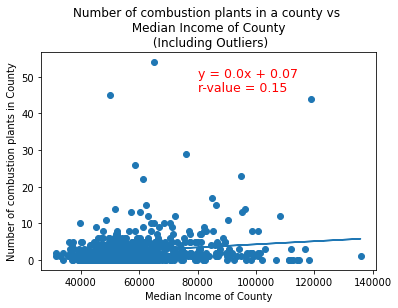

In [15]:
#Plot the total number of combustion powered plants in a county
# against the median income of that county

x_values = data_df["Median Income"]
y_values = data_df["num_combustion"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
rvalue_string = f"r-value = {str(round(rvalue,2))}"

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values)
plt.annotate(line_eq,(80000,50),fontsize=12.5,color= "red")
plt.annotate(rvalue_string, (80000,46), fontsize = 12.5, color = "red")
plt.xlabel("Median Income of County")
plt.ylabel("Number of combustion plants in County")
plt.title("Number of combustion plants in a county vs \n Median Income of County \n (Including Outliers)")
print(f"The r-value for this is {rvalue}")

plt.savefig("../Output/Images/combustion_plants_against_median_income(Inc_Outliers).png", bbox_inches = "tight")
plt.show


The r-value for this is -0.12798985941108768


<function matplotlib.pyplot.show(*args, **kw)>

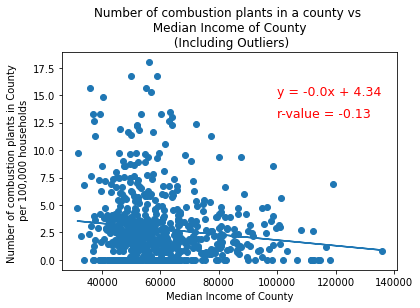

In [16]:
#Plot the total number of combustion powered plants in a county (normalized by population)
# against the median income of that county

x_values = data_df["Median Income"]
y_values = data_df["combustion_per_100000households"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
rvalue_string = f"r-value = {str(round(rvalue,2))}"

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values)
plt.annotate(line_eq,(100000,15),fontsize=12.5,color="red")
plt.annotate(rvalue_string, (100000,13), fontsize = 12.5, color = "red")
plt.xlabel("Median Income of County")
plt.ylabel("Number of combustion plants in County \n per 100,000 households")
plt.title("Number of combustion plants in a county vs \n Median Income of County \n (Including Outliers)")
print(f"The r-value for this is {rvalue}")

plt.savefig("../Output/Images/combustion_plants_per_household_against_median_income(Inc_Outliers).png", bbox_inches = "tight")
plt.show


In [17]:
#Determing outliers
quartiles = data_df["combustion_per_100000households"].quantile([.25, .5, .75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
outliers_df = data_df.loc[(data_df["combustion_per_100000households"] < lower_bound) | (data_df["combustion_per_100000households"] > upper_bound)]
print(outliers_df["County"])
print(f"The upper bound is {upper_bound}")
print(f"The lower bound is {lower_bound}")

10             Sutter County, California
11      Cleveland County, North Carolina
17             Olmsted County, Minnesota
25               Kern County, California
63           Calcasieu Parish, Louisiana
88                     Linn County, Iowa
89                  Dubuque County, Iowa
98              Twin Falls County, Idaho
111                   Story County, Iowa
126          San Juan County, New Mexico
145         Blue Earth County, Minnesota
159        Cumberland County, New Jersey
161                Butler County, Kansas
166              Ottawa County, Michigan
167                  Maui County, Hawaii
169             Kings County, California
204                Bastrop County, Texas
239          Sherburne County, Minnesota
244               Wood County, Wisconsin
267               Payne County, Oklahoma
285                   Wise County, Texas
286         Burke County, North Carolina
302    Orangeburg County, South Carolina
303          Ascension Parish, Louisiana
313          Imp

In [18]:
data_no_outliers_df = data_df.loc[(data_df["combustion_per_100000households"] < upper_bound) & (data_df["combustion_per_100000households"] > lower_bound)]
data_no_outliers_df

,Unnamed: 0,County,num_solar,num_gas,num_oil,num_hydro,num_wind,num_coal,num_biomass,num_storage,num_cogeneration,num_geothermal,num_petcoke,num_nuclear,num_other,Total Households,Median Income,Total Powerplants,num_combustion,combustion_per_100000households
0,0,"Rockland County, New York",2.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100167.0,88726.0,8.0,6.0,5.989997
1,1,"Mercer County, New Jersey",13.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,128757.0,79173.0,19.0,5.0,3.883284
2,2,"Norfolk County, Massachusetts",14.0,7.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,263862.0,100829.0,23.0,8.0,3.031888
3,3,"Los Angeles County, California",113.0,49.0,2.0,19.0,1.0,0.0,3.0,5.0,4.0,0.0,0.0,0.0,0.0,3311231.0,65006.0,196.0,54.0,1.630813
4,4,"Middlesex County, New Jersey",41.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,285446.0,85337.0,49.0,8.0,2.802632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681,681,"Collier County, Florida",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,144354.0,66048.0,0.0,0.0,0.000000
682,682,"Shawnee County, Kansas",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73724.0,57095.0,0.0,0.0,0.000000
683,683,"Putnam County, New York",0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34549.0,99479.0,1.0,1.0,2.894440
684,684,"Coweta County, Georgia",0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52796.0,72787.0,1.0,1.0,1.894083


The r-value for this is -0.09473355173899038


<function matplotlib.pyplot.show(*args, **kw)>

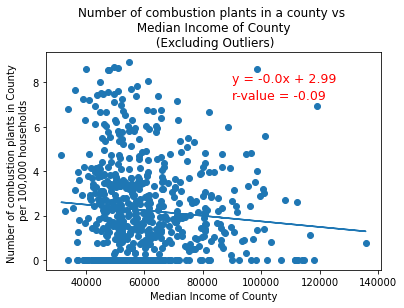

In [19]:
#Plot the total number of combustion powered plants in a county (normalized by population)
# against the median income of that county
#Not including the outliers

x_values = data_no_outliers_df["Median Income"]
y_values = data_no_outliers_df["combustion_per_100000households"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
rvalue_string = f"r-value = {str(round(rvalue,2))}"

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values)
plt.annotate(line_eq,(90000,8),fontsize=12.5,color="red")
plt.annotate(rvalue_string, (90000,7.25), fontsize = 12.5, color = "red")
plt.xlabel("Median Income of County")
plt.ylabel("Number of combustion plants in County \n per 100,000 households")
plt.title("Number of combustion plants in a county vs \n Median Income of County \n (Excluding Outliers)")
print(f"The r-value for this is {rvalue}")

plt.savefig("../Output/Images/combustion_plants_per_household_against_median_income(Exc_Outliers).png", bbox_inches = "tight")
plt.show
